This notebook tests / demonstrates the SimpleITK re-implementation of the IPL knee autocontour scripts

In [1]:
import SimpleITK as sitk
import numpy as np
import matplotlib.pyplot as plt

from AutocontourKnee import AutocontourKnee

In [2]:
# create an autocontour object
autok = AutocontourKnee()

In [3]:
# load a test image
img_fn = '/Users/nathanneeteson/Projects/JCWMSK/data/BMLT_003_BL_mid.mha'

img  = sitk.ReadImage(img_fn)

In [4]:
# extract a section of the image so everything runs faster

img_size = img.GetSize()

extract_filter = sitk.RegionOfInterestImageFilter()
extract_filter.SetSize([s//3 for s in img_size])

img = extract_filter.Execute(img)

In [5]:
img_np = sitk.GetArrayFromImage(img)

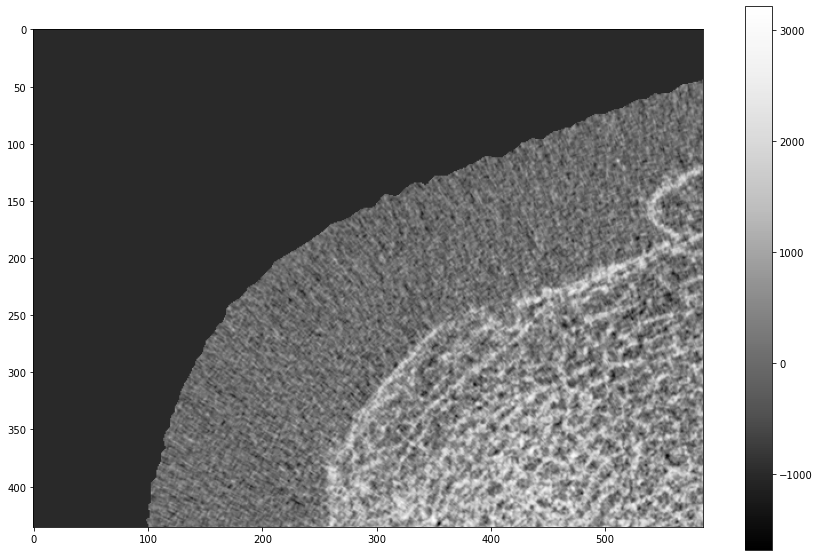

In [6]:
slice_index = 168//3//2

plt.figure(figsize=(15,10))

plt.imshow(img_np[slice_index,:,:],cmap='Greys_r')

plt.colorbar()

plt.show()

In [7]:
peri = autok.get_periosteal_mask(img)

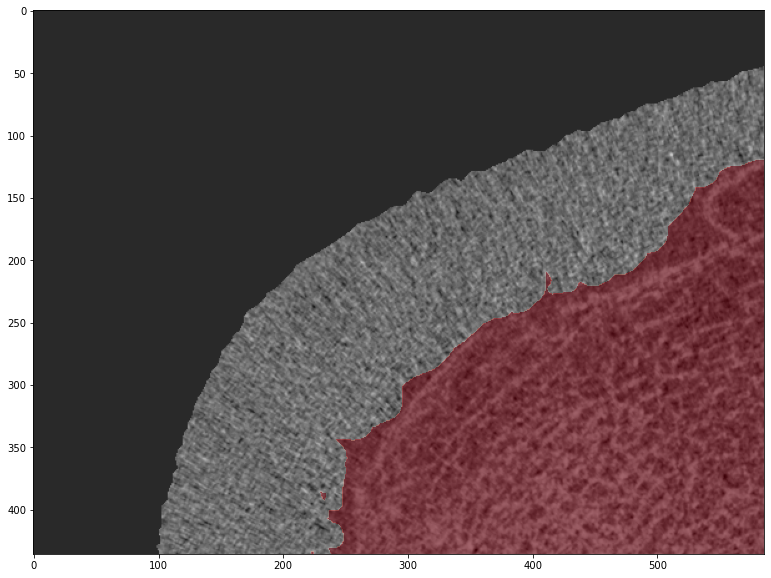

In [8]:
peri_np = sitk.GetArrayFromImage(peri)>0

slice_index = 168//3//2

plt.figure(figsize=(15,10))

plt.imshow(img_np[slice_index,:,:],cmap='Greys_r')
plt.imshow(peri_np[slice_index,:,:],cmap='Reds',alpha=0.6*peri_np[slice_index,:,:])

plt.show()

In [10]:
print(type(peri))

<class 'SimpleITK.SimpleITK.Image'>
